***
**Exercise 1**  
*Make a histogram from a 2d random distribution*

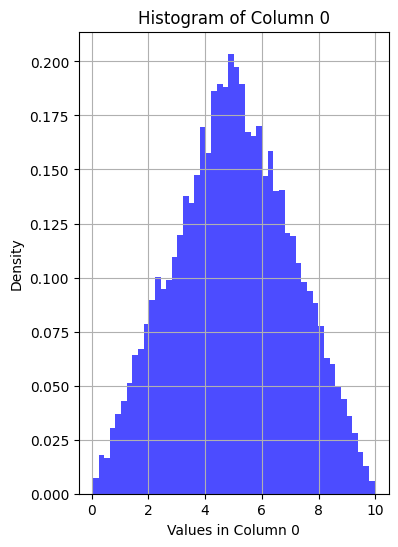

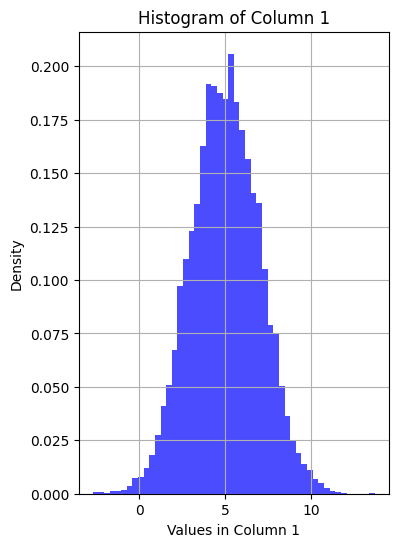

In [ ]:
import numpy as np
from data_aquisition import DataAquisition as aq

size = 10000

random_2d = aq.random_2d_dist(size=size)


aq_instance = aq(random_2d)

aq_instance.plot_histograms()



**Exercise 2**  
*Make a 2d heat map from a 2d random distribution*

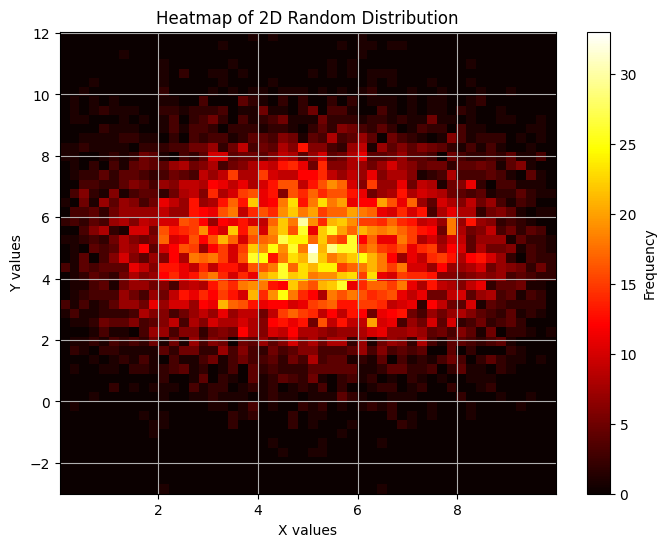

In [ ]:
aq_instance.plot_heatmap() #Same distribution as above

**Exercise 3**  
*Make a histogram for the source data you selected*

**Exercise 4**  
*Convert the histogram into a discrete PMF*

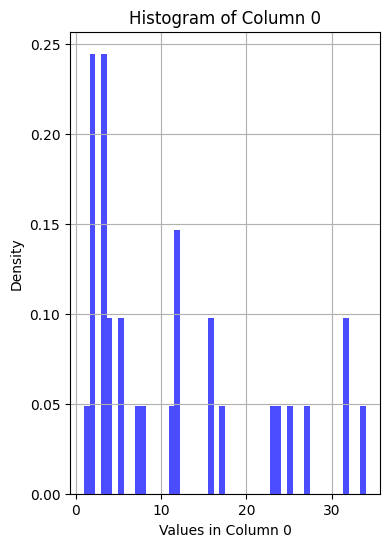

In [4]:
random_data_df = pd.read_csv('../data/random_data.csv') # Reading data from a random file to check if the code works.
aq_test = DataAquisition(random_data_df.values)
aq_test.plot_histograms()


**Exercise 5**  
*Calculate the cumulative for each feature*